In [34]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Exercise 2

In [3]:
link = "https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv"
df = pd.read_csv(link)
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [7]:
# Transform loan_status
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'PAIDOFF' else 0)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,1,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,1,1000,15,9/8/2016,9/22/2016,27,college,male
3,1,1000,30,9/9/2016,10/8/2016,28,college,female
4,1,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,0,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,0,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,0,800,15,9/12/2016,9/26/2016,39,college,male
344,0,1000,30,9/12/2016,11/10/2016,28,college,male


In [29]:
# Create due_period columns
from datetime import datetime

def datediff(d1, d2):
    dt1 = datetime.strptime(d1, '%m/%d/%Y')
    dt2 = datetime.strptime(d2, '%m/%d/%Y')

    return (dt2-dt1).days + 1

df['due_period'] = df[['effective_date', 'due_date']].apply(lambda x: datediff(x['effective_date'], x['due_date']), 
                                                           axis=1)

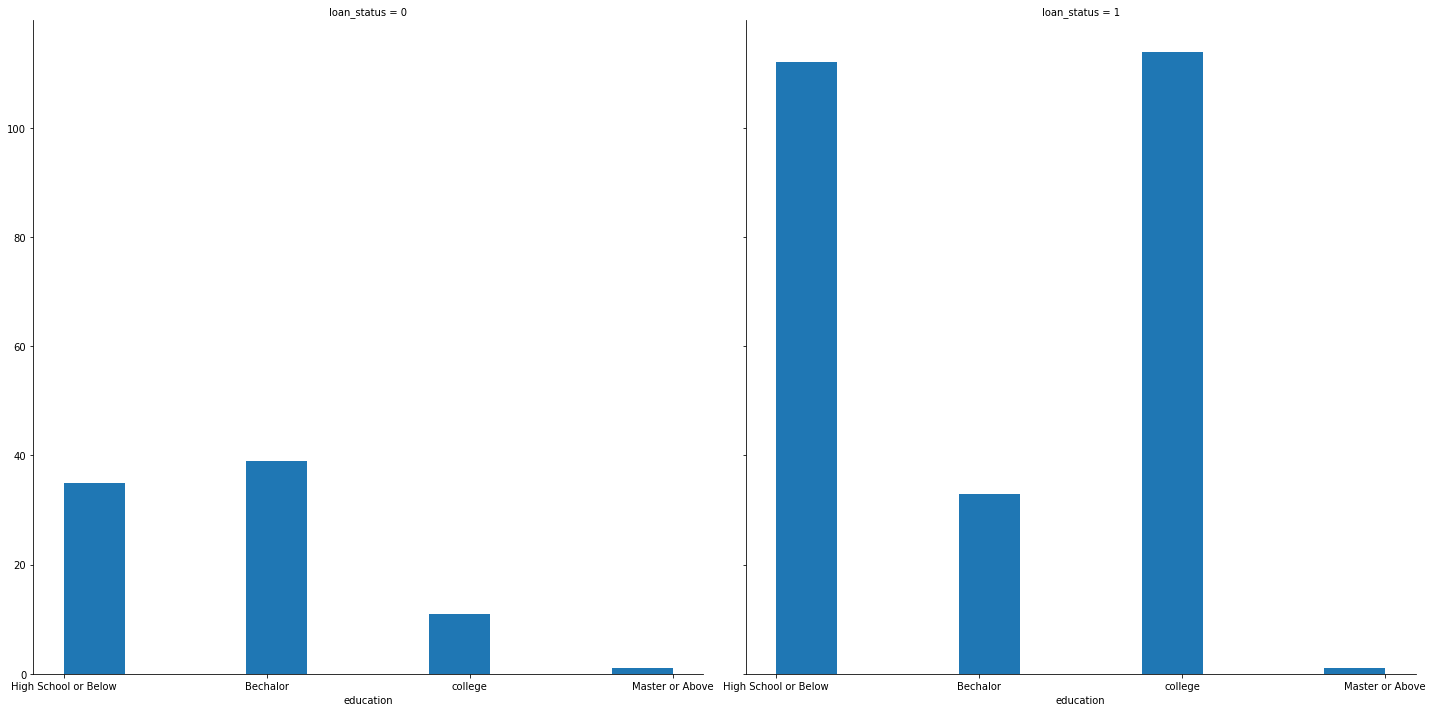

In [40]:
# Education

g = sns.FacetGrid(df, col='loan_status', height=10)
g.map(plt.hist, 'education')

In [46]:
df[df['loan_status'] == 1].groupby('education').size()/ \
df.groupby('education').size()* 100

education
Bechalor                75.000000
High School or Below    74.172185
Master or Above         50.000000
college                 76.510067
dtype: float64

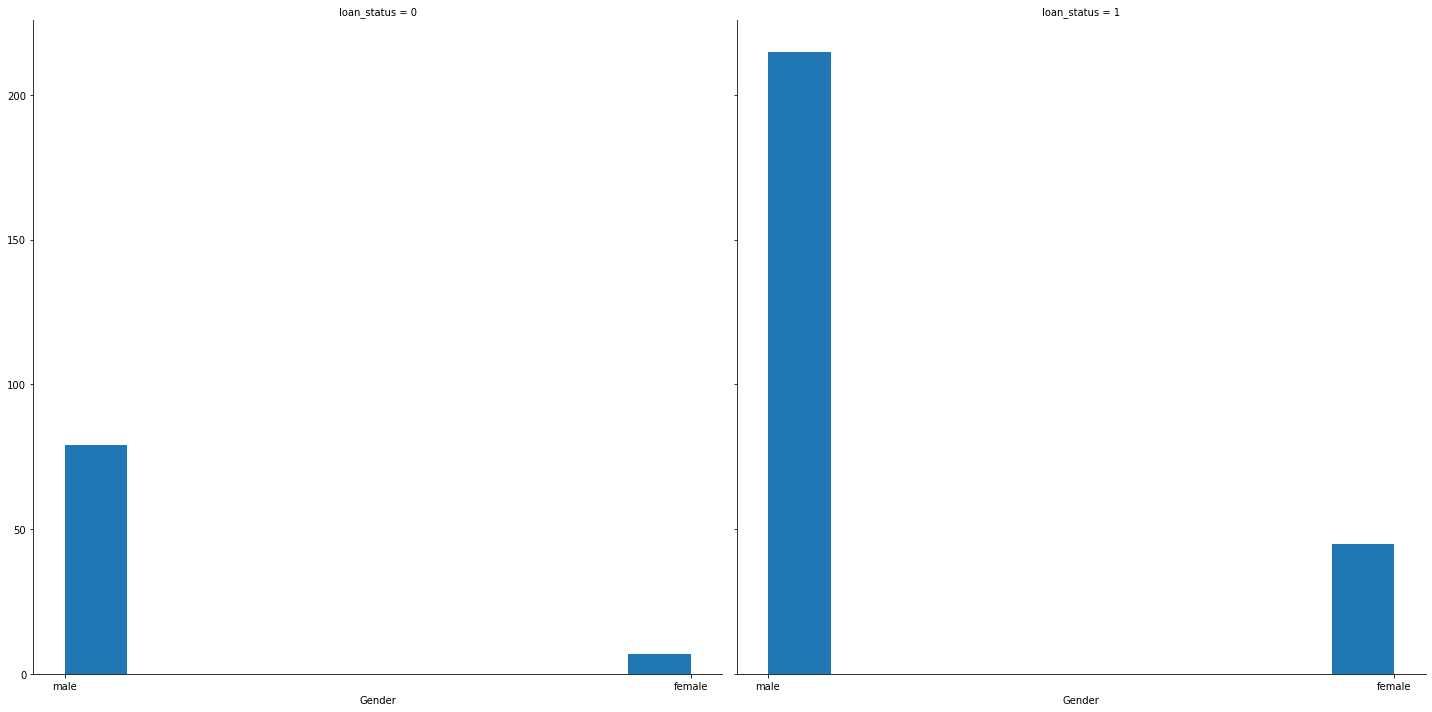

In [39]:
# Gender

g = sns.FacetGrid(df, col='loan_status', height=10)
g.map(plt.hist, 'Gender')

In [47]:
df[df['loan_status'] == 1].groupby('Gender').size()/ \
df.groupby('Gender').size()* 100

Gender
female    86.538462
male      73.129252
dtype: float64

In [48]:
# Choose features

columns = ['Principal', 'terms', 'age', 'due_period', 'loan_status']
df = df[columns]

In [58]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [62]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, random_state=1)
logreg = LogisticRegression(solver='lbfgs', max_iter=100)

lr = logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)
lr.score(Xtest, ytest)

0.7011494252873564

In [68]:
sum(y_pred == ytest)/87

0.7011494252873564